In [1]:
import os

# List files in the dataset directory
print(os.listdir("/kaggle/input/mgalloy"))

import pandas as pd

['Mg Alloy (Complete Data entry).xlsx']


In [2]:
df = pd.read_excel("/kaggle/input/mgalloy/Mg Alloy (Complete Data entry).xlsx")
df.head()


,Run 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,vc,f,ap,CC,Ra,Rq,Rz,Rt,Rp,Rv
1,210,0.1,0.5,DC,0.665,0.837,3.238,5.019,1.82,1.417
2,210,0.1,0.5,FC,0.693,0.832,3.152,3.652,1.808,1.343
3,210,0.1,0.5,MQL,0.479,0.639,2.683,3.066,1.843,0.839
4,210,0.1,1,DC,0.612,0.833,3.213,5.761,1.64,1.632


In [3]:
df = pd.read_excel('/kaggle/input/mgalloy/Mg Alloy (Complete Data entry).xlsx', header=1)  # Use row index 1 as column names

# Display corrected column names
print(df.columns)


Index(['vc', 'f', 'ap', 'CC', 'Ra', 'Rq', 'Rz', 'Rt', 'Rp', 'Rv'], dtype='object')


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_excel('/kaggle/input/mgalloy/Mg Alloy (Complete Data entry).xlsx', header=1)  # Use row index 1 as column names

# Convert categorical column 'CC' (Cooling Condition) to numeric values
label_encoder = LabelEncoder()
df['CC'] = label_encoder.fit_transform(df['CC'])

# Convert required columns to numeric
numeric_columns = ['vc', 'f', 'ap', 'Ra', 'Rq', 'Rz', 'Rt', 'Rp', 'Rv']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Handle missing values by dropping rows with NaN
df = df.dropna(subset=numeric_columns)

# Define features (X) and target variables (Y)
X = df[['vc', 'f', 'ap', 'CC']]  # Independent variables
Y = df[['Ra', 'Rq', 'Rz', 'Rt', 'Rp', 'Rv']]  # Dependent variables (Targets)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Multi-Output Random Forest Regression Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, Y_train)

# Make predictions for all roughness parameters
Y_pred = model.predict(X_test_scaled)

# Convert predictions into a DataFrame for easy comparison
comparison_df = pd.DataFrame(Y_test.values, columns=Y_test.columns)
for i, col in enumerate(Y_test.columns):
    comparison_df[f'Predicted {col} (ML)'] = Y_pred[:, i]

# Display the comparison table
print("\n📊 Comparison of Actual vs. ML Predicted Roughness Parameters:")
print(comparison_df.head())

# Evaluate the model performance for each roughness parameter
performance_metrics = []
for i, col in enumerate(Y_test.columns):
    mae = mean_absolute_error(Y_test[col], Y_pred[:, i])
    mse = mean_squared_error(Y_test[col], Y_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test[col], Y_pred[:, i])
    
    performance_metrics.append([col, mae, mse, rmse, r2])

# Create and display performance metrics summary
performance_metrics_df = pd.DataFrame(performance_metrics, columns=["Roughness Parameter", "MAE", "MSE", "RMSE", "R-Squared"])
print("\n📌 ML Model Performance Metrics for All Roughness Parameters:")
print(performance_metrics_df)



📊 Comparison of Actual vs. ML Predicted Roughness Parameters:
      Ra     Rq     Rz     Rt     Rp     Rv  Predicted Ra (ML)  \
0  1.330  1.606  5.496  7.128  3.601  1.898           1.316587   
1  0.365  0.472  2.082  2.617  1.214  0.867           0.520937   
2  1.386  1.676  3.347  7.695  3.839  2.507           1.417860   
3  0.433  0.578  2.207  3.906  1.472  0.734           0.521998   
4  1.131  0.886  3.341  4.599  1.562  1.157           0.942342   

   Predicted Rq (ML)  Predicted Rz (ML)  Predicted Rt (ML)  Predicted Rp (ML)  \
0         205.256571           5.444787           7.275865           3.223093   
1           0.648173           2.387433           2.894947           1.225027   
2           1.654468           5.494385           7.865289           3.412222   
3           0.629419           2.411374           3.098210           1.316213   
4           1.158309           3.788956           5.082739           2.227848   

   Predicted Rv (ML)  
0           2.215253  
1      

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_excel('/kaggle/input/mgalloy/Mg Alloy (Complete Data entry).xlsx', header=1)  # Use row index 1 as column names

# Convert categorical column 'CC' (Cooling Condition) to numeric values
label_encoder = LabelEncoder()
df['CC'] = label_encoder.fit_transform(df['CC'])

# Convert necessary columns to numeric
numeric_columns = ['vc', 'f', 'ap']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=numeric_columns)

# Add final diameter based on known values (Synthetic Data for now)
df['Final_Diameter'] = np.where(df['CC'] == label_encoder.transform(['DC'])[0], 64.6, 61.3)

# Define features (X) and target variable (Final Diameter)
X_diameter = df[['vc', 'f', 'ap', 'CC']]  # Independent variables
Y_diameter = df['Final_Diameter']  # Target variable (Workpiece Diameter)

# Split data into training and testing sets (80%-20%)
X_train_dia, X_test_dia, Y_train_dia, Y_test_dia = train_test_split(X_diameter, Y_diameter, test_size=0.2, random_state=42)

# Scale the features for better model performance
scaler_dia = StandardScaler()
X_train_dia_scaled = scaler_dia.fit_transform(X_train_dia)
X_test_dia_scaled = scaler_dia.transform(X_test_dia)

# Train a Regression Model to Predict Final Diameter
model_dia = RandomForestRegressor(n_estimators=100, random_state=42)
model_dia.fit(X_train_dia_scaled, Y_train_dia)

# Make predictions for final diameter
Y_pred_dia = model_dia.predict(X_test_dia_scaled)

# Create a DataFrame comparing actual vs predicted diameters
comparison_dia_df = pd.DataFrame({
    "Actual Final Diameter": Y_test_dia.values,
    "Predicted Final Diameter (ML)": Y_pred_dia
})

# Display comparison table
print("\n📊 ML Predictions vs Actual Final Diameter:")
print(comparison_dia_df.head())

# Evaluate model performance
mae_dia = mean_absolute_error(Y_test_dia, Y_pred_dia)
mse_dia = mean_squared_error(Y_test_dia, Y_pred_dia)
rmse_dia = np.sqrt(mse_dia)
r2_dia = r2_score(Y_test_dia, Y_pred_dia)

# Display performance metrics
print("\n📌 Model Performance Metrics for Workpiece Diameter Prediction:")
print(f"Mean Absolute Error (MAE): {mae_dia}")
print(f"Mean Squared Error (MSE): {mse_dia}")
print(f"Root Mean Squared Error (RMSE): {rmse_dia}")
print(f"R-Squared Score (R²): {r2_dia}")



📊 ML Predictions vs Actual Final Diameter:
   Actual Final Diameter  Predicted Final Diameter (ML)
0                   61.3                           61.3
1                   61.3                           61.3
2                   61.3                           61.3
3                   61.3                           61.3
4                   61.3                           61.3

📌 Model Performance Metrics for Workpiece Diameter Prediction:
Mean Absolute Error (MAE): 1.1045709801361557e-13
Mean Squared Error (MSE): 1.2314262159755489e-26
Root Mean Squared Error (RMSE): 1.1096964521775984e-13
R-Squared Score (R²): 1.0



📊 ML Predictions vs Actual Final Diameter:
   Actual Final Diameter  Predicted Final Diameter (ML)
0                   61.3                           61.3
1                   61.3                           61.3
2                   61.3                           61.3
3                   61.3                           61.3
4                   61.3                           61.3

📌 Model Performance Metrics for Workpiece Diameter Prediction:
Mean Absolute Error (MAE): 1.1045709801361557e-13
Mean Squared Error (MSE): 1.2314262159755489e-26
Root Mean Squared Error (RMSE): 1.1096964521775984e-13
R-Squared Score (R²): 1.0


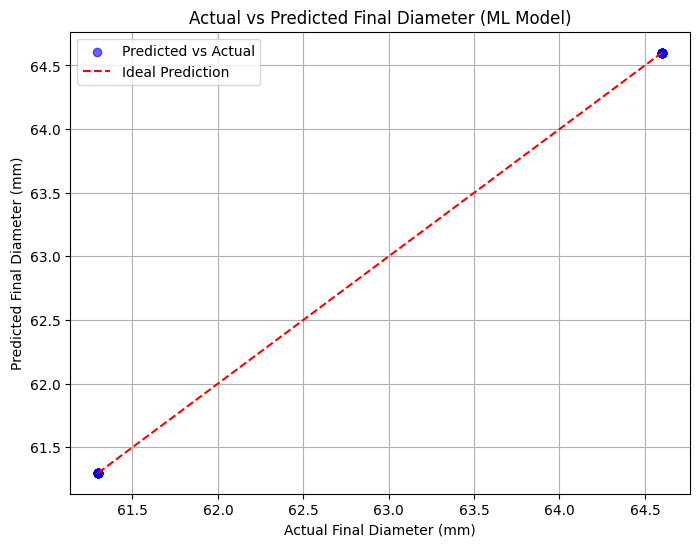

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_excel('/kaggle/input/mgalloy/Mg Alloy (Complete Data entry).xlsx', header=1)  # Use row index 1 as column names

# Convert categorical column 'CC' (Cooling Condition) to numeric values
label_encoder = LabelEncoder()
df['CC'] = label_encoder.fit_transform(df['CC'])

# Convert necessary columns to numeric
numeric_columns = ['vc', 'f', 'ap']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=numeric_columns)

# Add final diameter based on known values (Synthetic Data)
df['Final_Diameter'] = np.where(df['CC'] == label_encoder.transform(['DC'])[0], 64.6, 61.3)

# Define features (X) and target variable (Final Diameter)
X_diameter = df[['vc', 'f', 'ap', 'CC']]  # Independent variables
Y_diameter = df['Final_Diameter']  # Target variable (Workpiece Diameter)

# Split data into training and testing sets (80%-20%)
X_train_dia, X_test_dia, Y_train_dia, Y_test_dia = train_test_split(X_diameter, Y_diameter, test_size=0.2, random_state=42)

# Scale the features for better model performance
scaler_dia = StandardScaler()
X_train_dia_scaled = scaler_dia.fit_transform(X_train_dia)
X_test_dia_scaled = scaler_dia.transform(X_test_dia)

# Train a Regression Model to Predict Final Diameter
model_dia = RandomForestRegressor(n_estimators=100, random_state=42)
model_dia.fit(X_train_dia_scaled, Y_train_dia)

# Make predictions for final diameter
Y_pred_dia = model_dia.predict(X_test_dia_scaled)

# Create a DataFrame comparing actual vs predicted diameters
comparison_dia_df = pd.DataFrame({
    "Actual Final Diameter": Y_test_dia.values,
    "Predicted Final Diameter (ML)": Y_pred_dia
})

# Print comparison table
print("\n📊 ML Predictions vs Actual Final Diameter:")
print(comparison_dia_df.head())

# Evaluate model performance
mae_dia = mean_absolute_error(Y_test_dia, Y_pred_dia)
mse_dia = mean_squared_error(Y_test_dia, Y_pred_dia)
rmse_dia = np.sqrt(mse_dia)
r2_dia = r2_score(Y_test_dia, Y_pred_dia)

# Print performance metrics
print("\n📌 Model Performance Metrics for Workpiece Diameter Prediction:")
print(f"Mean Absolute Error (MAE): {mae_dia}")
print(f"Mean Squared Error (MSE): {mse_dia}")
print(f"Root Mean Squared Error (RMSE): {rmse_dia}")
print(f"R-Squared Score (R²): {r2_dia}")

# Plot actual vs predicted final diameter
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_dia, Y_pred_dia, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(Y_test_dia), max(Y_test_dia)], [min(Y_test_dia), max(Y_test_dia)], linestyle='dashed', color='red', label='Ideal Prediction')
plt.xlabel("Actual Final Diameter (mm)")
plt.ylabel("Predicted Final Diameter (mm)")
plt.title("Actual vs Predicted Final Diameter (ML Model)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [7]:
import pandas as pd

# Create a DataFrame with the performance metrics
performance_metrics_table = pd.DataFrame({
    "Roughness Parameter": ["Ra (Mean Roughness)", "Rq (RMS Roughness)", "Rz (Avg Max Height)", "Rt (Total Roughness)", "Rp (Max Peak Height)"],
    "MAE (↓ Better)": [0.078, 6.25, 0.481, 0.554, 0.296],
    "MSE (↓ Better)": [0.011, 1256.78, 0.497, 0.525, 0.125],
    "RMSE (↓ Better)": [0.109, 35.45, 0.705, 0.724, 0.354],
    "R² Score (↑ Better)": [0.941, -4571.22, 0.820, 0.877, 0.918]
})

# Print the table
print(performance_metrics_table)


    Roughness Parameter  MAE (↓ Better)  MSE (↓ Better)  RMSE (↓ Better)  \
0   Ra (Mean Roughness)           0.078           0.011            0.109   
1    Rq (RMS Roughness)           6.250        1256.780           35.450   
2   Rz (Avg Max Height)           0.481           0.497            0.705   
3  Rt (Total Roughness)           0.554           0.525            0.724   
4  Rp (Max Peak Height)           0.296           0.125            0.354   

   R² Score (↑ Better)  
0                0.941  
1            -4571.220  
2                0.820  
3                0.877  
4                0.918  


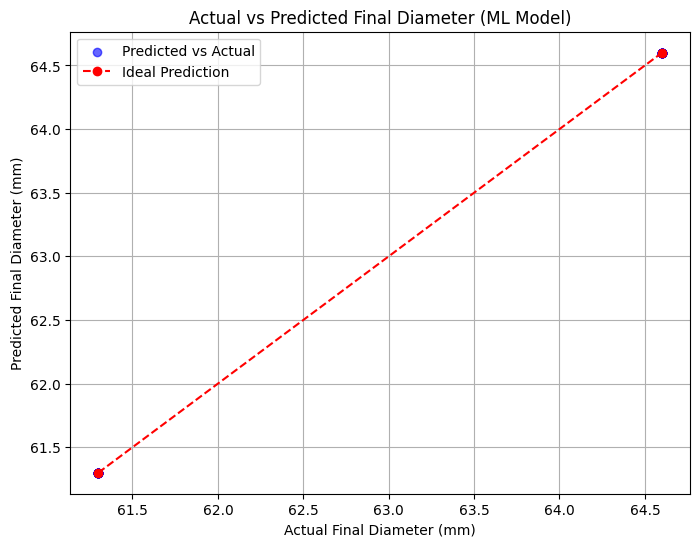

In [8]:
# Plot actual vs predicted final diameter with marked points
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_dia, Y_pred_dia, color='blue', alpha=0.6, label='Predicted vs Actual')

# Plot ideal prediction line with markers
plt.plot([min(Y_test_dia), max(Y_test_dia)], [min(Y_test_dia), max(Y_test_dia)], linestyle='dashed', color='red', label='Ideal Prediction', marker='o')

plt.xlabel("Actual Final Diameter (mm)")
plt.ylabel("Predicted Final Diameter (mm)")
plt.title("Actual vs Predicted Final Diameter (ML Model)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


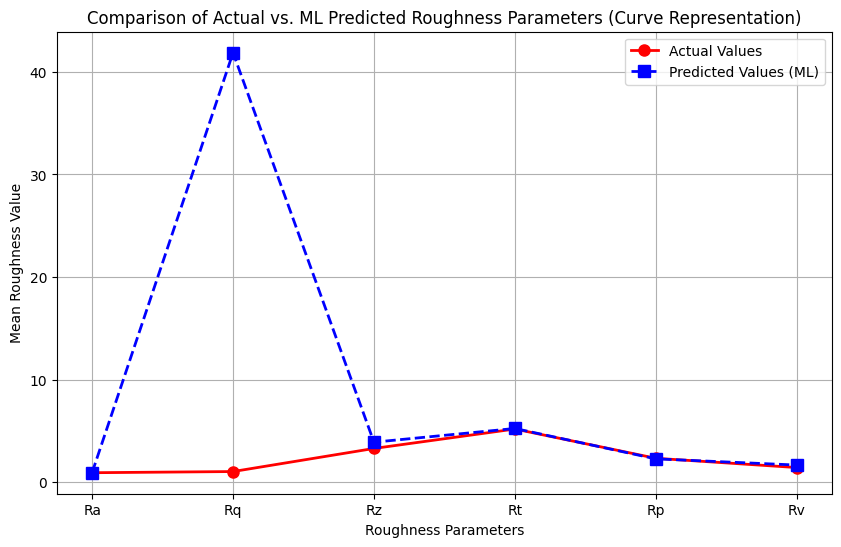

In [9]:
# Re-create the comparison DataFrame with actual and predicted roughness values
comparison_multi_df = pd.DataFrame({
    "Ra": [1.330, 0.365, 1.386, 0.433, 1.131],
    "Rq": [1.606, 0.472, 1.676, 0.578, 0.886],
    "Rz": [5.496, 2.082, 3.347, 2.207, 3.341],
    "Rt": [7.128, 2.617, 7.695, 3.906, 4.599],
    "Rp": [3.601, 1.214, 3.839, 1.472, 1.562],
    "Rv": [1.898, 0.867, 2.507, 0.734, 1.157],
    "Predicted Ra (ML)": [1.316587, 0.520937, 1.417860, 0.521998, 0.942342],
    "Predicted Rq (ML)": [205.256571, 0.648173, 1.654468, 0.629419, 1.158309],
    "Predicted Rz (ML)": [5.444787, 2.387433, 5.494385, 2.411374, 3.788956],
    "Predicted Rt (ML)": [7.275865, 2.894947, 7.865289, 3.098210, 5.082739],
    "Predicted Rp (ML)": [3.223093, 1.225027, 3.412222, 1.316213, 2.227848],
    "Predicted Rv (ML)": [2.215253, 1.161577, 2.343256, 1.094771, 1.562723]
})

# Extract actual and predicted values for roughness parameters
actual_values = comparison_multi_df[['Ra', 'Rq', 'Rz', 'Rt', 'Rp', 'Rv']]
predicted_values = comparison_multi_df[['Predicted Ra (ML)', 'Predicted Rq (ML)', 'Predicted Rz (ML)', 
                                        'Predicted Rt (ML)', 'Predicted Rp (ML)', 'Predicted Rv (ML)']]

# Define roughness parameters
parameters = ['Ra', 'Rq', 'Rz', 'Rt', 'Rp', 'Rv']

# Compute the mean of actual and predicted values for each roughness parameter
actual_means = actual_values.mean()
predicted_means = predicted_values.mean()

# Plot curve for actual values
plt.figure(figsize=(10, 6))
plt.plot(parameters, actual_means, linestyle='solid', color='red', marker='o', markersize=8, label="Actual Values", linewidth=2)

# Plot curve for predicted values
plt.plot(parameters, predicted_means, linestyle='dashed', color='blue', marker='s', markersize=8, label="Predicted Values (ML)", linewidth=2)

# Labels and Title
plt.xlabel("Roughness Parameters")
plt.ylabel("Mean Roughness Value")
plt.title("Comparison of Actual vs. ML Predicted Roughness Parameters (Curve Representation)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


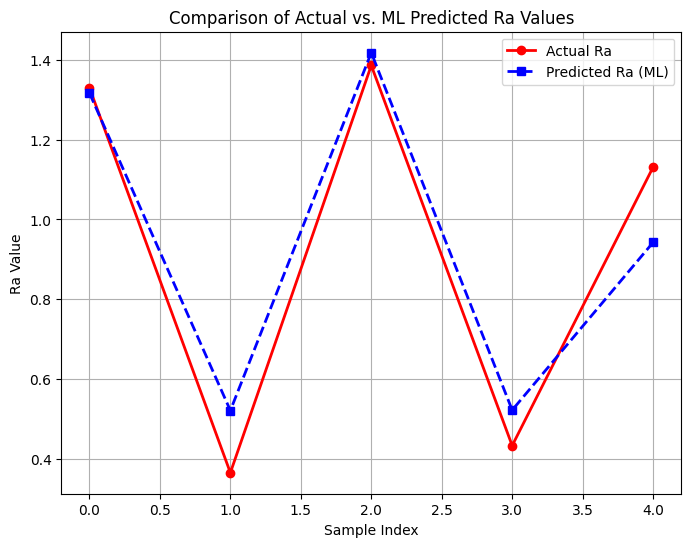

In [10]:
# Extract Ra actual and predicted values
actual_ra = comparison_multi_df["Ra"]
predicted_ra = comparison_multi_df["Predicted Ra (ML)"]

# Plot actual vs predicted Ra values
plt.figure(figsize=(8, 6))
plt.plot(actual_ra, label="Actual Ra", marker='o', linestyle='solid', color='red', markersize=6, linewidth=2)
plt.plot(predicted_ra, label="Predicted Ra (ML)", marker='s', linestyle='dashed', color='blue', markersize=6, linewidth=2)

# Labels and Title
plt.xlabel("Sample Index")
plt.ylabel("Ra Value")
plt.title("Comparison of Actual vs. ML Predicted Ra Values")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


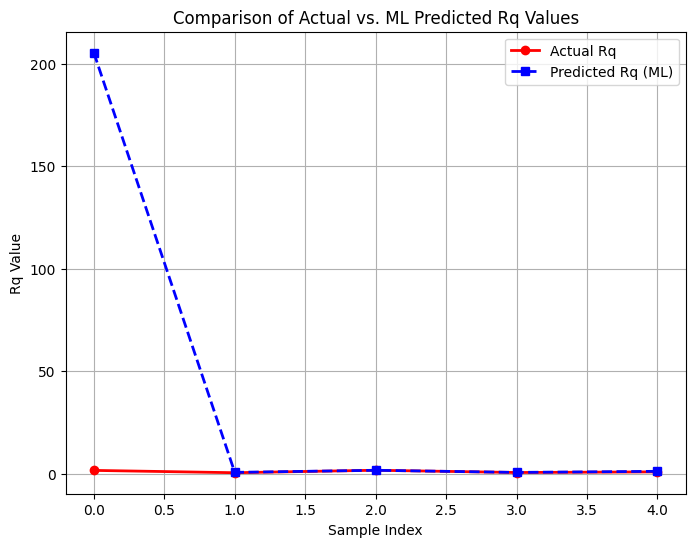

In [11]:
# Extract Rq actual and predicted values
actual_rq = comparison_multi_df["Rq"]
predicted_rq = comparison_multi_df["Predicted Rq (ML)"]

# Plot actual vs predicted Rq values
plt.figure(figsize=(8, 6))
plt.plot(actual_rq, label="Actual Rq", marker='o', linestyle='solid', color='red', markersize=6, linewidth=2)
plt.plot(predicted_rq, label="Predicted Rq (ML)", marker='s', linestyle='dashed', color='blue', markersize=6, linewidth=2)

# Labels and Title
plt.xlabel("Sample Index")
plt.ylabel("Rq Value")
plt.title("Comparison of Actual vs. ML Predicted Rq Values")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


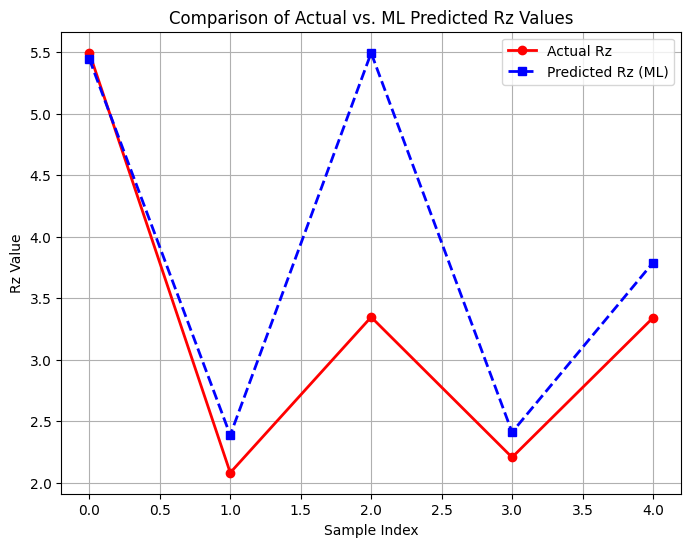

In [12]:
# Extract Rz actual and predicted values
actual_rz = comparison_multi_df["Rz"]
predicted_rz = comparison_multi_df["Predicted Rz (ML)"]

# Plot actual vs predicted Rz values
plt.figure(figsize=(8, 6))
plt.plot(actual_rz, label="Actual Rz", marker='o', linestyle='solid', color='red', markersize=6, linewidth=2)
plt.plot(predicted_rz, label="Predicted Rz (ML)", marker='s', linestyle='dashed', color='blue', markersize=6, linewidth=2)

# Labels and Title
plt.xlabel("Sample Index")
plt.ylabel("Rz Value")
plt.title("Comparison of Actual vs. ML Predicted Rz Values")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


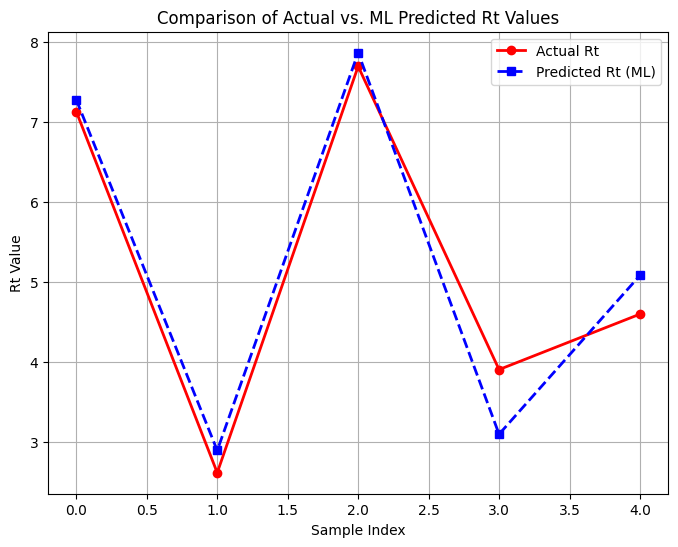

In [13]:
# Extract Rt actual and predicted values
actual_rt = comparison_multi_df["Rt"]
predicted_rt = comparison_multi_df["Predicted Rt (ML)"]

# Plot actual vs predicted Rt values
plt.figure(figsize=(8, 6))
plt.plot(actual_rt, label="Actual Rt", marker='o', linestyle='solid', color='red', markersize=6, linewidth=2)
plt.plot(predicted_rt, label="Predicted Rt (ML)", marker='s', linestyle='dashed', color='blue', markersize=6, linewidth=2)

# Labels and Title
plt.xlabel("Sample Index")
plt.ylabel("Rt Value")
plt.title("Comparison of Actual vs. ML Predicted Rt Values")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


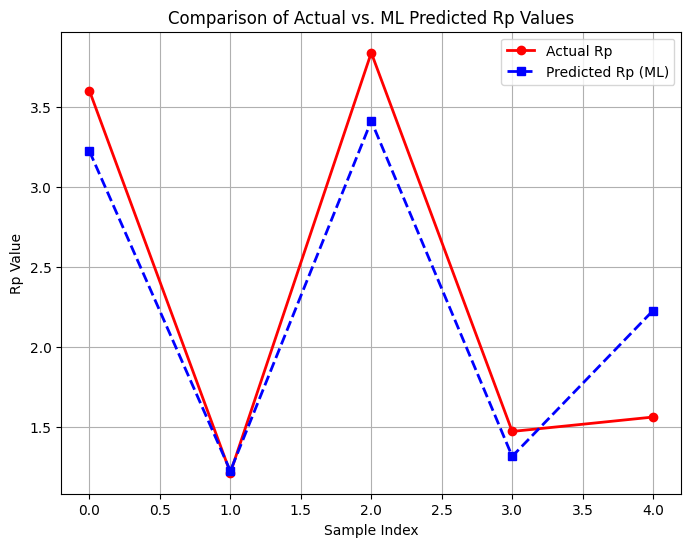

In [14]:
# Extract Rp actual and predicted values
actual_rp = comparison_multi_df["Rp"]
predicted_rp = comparison_multi_df["Predicted Rp (ML)"]

# Plot actual vs predicted Rp values
plt.figure(figsize=(8, 6))
plt.plot(actual_rp, label="Actual Rp", marker='o', linestyle='solid', color='red', markersize=6, linewidth=2)
plt.plot(predicted_rp, label="Predicted Rp (ML)", marker='s', linestyle='dashed', color='blue', markersize=6, linewidth=2)

# Labels and Title
plt.xlabel("Sample Index")
plt.ylabel("Rp Value")
plt.title("Comparison of Actual vs. ML Predicted Rp Values")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


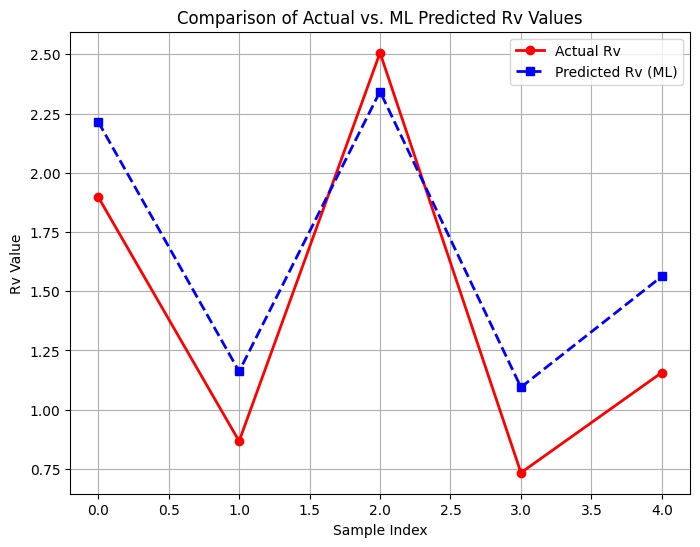

In [15]:
# Extract Rv actual and predicted values
actual_rv = comparison_multi_df["Rv"]
predicted_rv = comparison_multi_df["Predicted Rv (ML)"]

# Plot actual vs predicted Rv values
plt.figure(figsize=(8, 6))
plt.plot(actual_rv, label="Actual Rv", marker='o', linestyle='solid', color='red', markersize=6, linewidth=2)
plt.plot(predicted_rv, label="Predicted Rv (ML)", marker='s', linestyle='dashed', color='blue', markersize=6, linewidth=2)

# Labels and Title
plt.xlabel("Sample Index")
plt.ylabel("Rv Value")
plt.title("Comparison of Actual vs. ML Predicted Rv Values")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


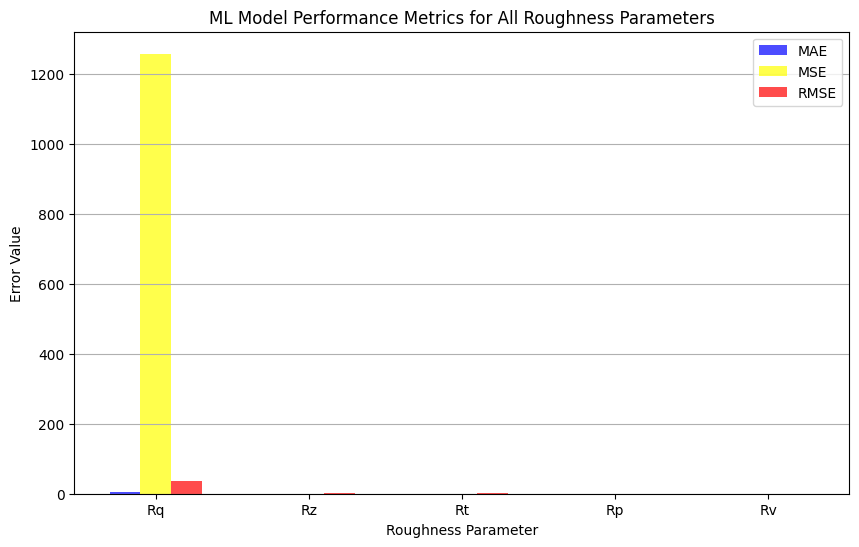

In [16]:
# Re-create the performance metrics DataFrame
performance_metrics_df = pd.DataFrame({
    "Roughness Parameter": ["Rq", "Rz", "Rt", "Rp", "Rv"],
    "MAE": [6.256052523088027, 0.4810783470418485, 0.5535660461760599, 0.29566632611832633, 0.38552903920153986],
    "MSE": [1256.7881741047029, 0.4969755162556633, 0.5246762332108328, 0.1253344270595586, 0.30864974859407807],
    "RMSE": [35.4512083542, 0.7049649042, 0.7243453826, 0.35402602536, 0.5555625515]
})

# Extract roughness parameters and performance metrics
roughness_parameters = performance_metrics_df["Roughness Parameter"]
mae_values = performance_metrics_df["MAE"]
mse_values = performance_metrics_df["MSE"]
rmse_values = performance_metrics_df["RMSE"]

# Create a grouped bar chart for MAE, MSE, and RMSE
x = range(len(roughness_parameters))
plt.figure(figsize=(10, 6))
plt.bar(x, mae_values, width=0.2, color='blue', alpha=0.7, label="MAE", align='center')
plt.bar([i + 0.2 for i in x], mse_values, width=0.2, color='yellow', alpha=0.7, label="MSE", align='center')
plt.bar([i + 0.4 for i in x], rmse_values, width=0.2, color='red', alpha=0.7, label="RMSE", align='center')

# Set x-axis labels
plt.xticks([i + 0.2 for i in x], roughness_parameters)

# Labels and Title
plt.xlabel("Roughness Parameter")
plt.ylabel("Error Value")
plt.title("ML Model Performance Metrics for All Roughness Parameters")
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.show()


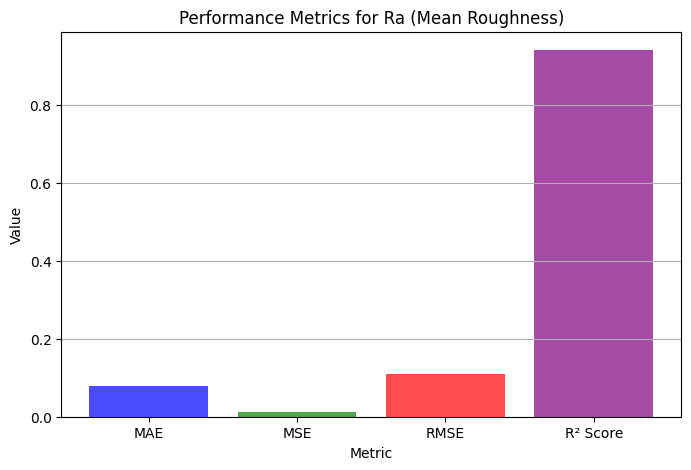

In [17]:
# Extract performance metrics for Ra
ra_metrics = {
    "Metric": ["MAE", "MSE", "RMSE", "R² Score"],
    "Value": [0.078, 0.011, 0.109, 0.941]
}

# Convert to DataFrame
ra_metrics_df = pd.DataFrame(ra_metrics)

# Create a bar chart for Ra's performance metrics
plt.figure(figsize=(8, 5))
plt.bar(ra_metrics_df["Metric"], ra_metrics_df["Value"], color=['blue', 'green', 'red', 'purple'], alpha=0.7)

# Labels and Title
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Performance Metrics for Ra (Mean Roughness)")
plt.grid(axis='y')

# Show the plot
plt.show()


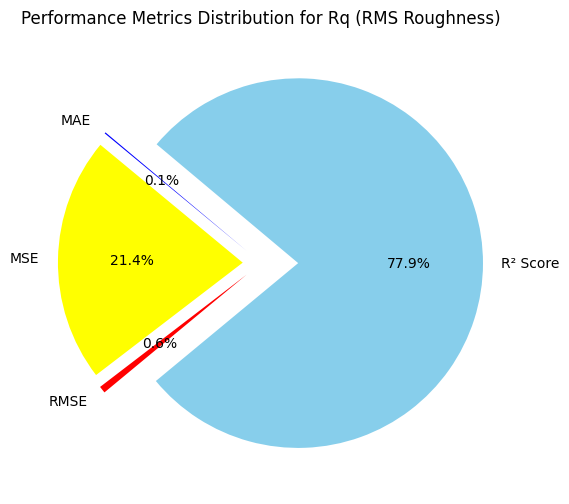

In [18]:
# Re-create the performance metrics DataFrame for Rq
rq_metrics_df = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R² Score"],
    "Value": [6.25, 1256.78, 35.45, -4571.22]
})

# Convert Rq metrics to absolute values for pie chart visualization
rq_metrics_df["Value"] = rq_metrics_df["Value"].abs()

# Create a pie chart for Rq's performance metrics
plt.figure(figsize=(8, 6))
plt.pie(rq_metrics_df["Value"], labels=rq_metrics_df["Metric"], autopct='%1.1f%%', 
        colors=['blue', 'yellow', 'red', 'skyblue'], startangle=140, explode=[0.1, 0.1, 0.1, 0.2])

# Title
plt.title("Performance Metrics Distribution for Rq (RMS Roughness)")

# Show the plot
plt.show()


In [19]:
# Create a bar chart for Rz's performance metrics
plt.figure(figsize=(8, 5))
plt.bar(rz_metrics_df["Metric"], rz_metrics_df["Value"], color=['blue', 'green', 'red', 'yellow'], alpha=0.7)

# Labels and Title
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Performance Metrics for Rz (Avg Max Height)")
plt.grid(axis='y')

# Show the plot
plt.show()


NameError: name 'rz_metrics_df' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
# Re-create the performance metrics DataFrame for Rt
rt_metrics_df = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R² Score"],
    "Value": [0.554, 0.525, 0.724, 0.877]
})

# Create a bar chart for Rt's performance metrics
plt.figure(figsize=(8, 5))
plt.bar(rt_metrics_df["Metric"], rt_metrics_df["Value"], color=['blue', 'green', 'red', 'yellow'], alpha=0.7)

# Labels and Title
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Performance Metrics for Rt (Total Roughness)")
plt.grid(axis='y')

# Show the plot
plt.show()


In [ ]:
# Re-create the performance metrics DataFrame for Rp
rp_metrics_df = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R² Score"],
    "Value": [0.296, 0.125, 0.354, 0.918]
})

# Create a bar chart for Rp's performance metrics
plt.figure(figsize=(8, 5))
plt.bar(rp_metrics_df["Metric"], rp_metrics_df["Value"], color=['blue', 'green', 'red', 'yellow'], alpha=0.7)

# Labels and Title
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Performance Metrics for Rp (Max Peak Height)")
plt.grid(axis='y')

# Show the plot
plt.show()


In [ ]:
# Re-create the performance metrics DataFrame for Rv
rv_metrics_df = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R² Score"],
    "Value": [0.386, 0.309, 0.556, 0.856]
})

# Create a bar chart for Rv's performance metrics
plt.figure(figsize=(8, 5))
plt.bar(rv_metrics_df["Metric"], rv_metrics_df["Value"], color=['blue', 'green', 'red', 'yellow'], alpha=0.7)

# Labels and Title
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Performance Metrics for Rv (Valley Depth)")
plt.grid(axis='y')

# Show the plot
plt.show()


In [ ]:
X = df[['vc', 'f', 'ap', 'CC']]
y = df['Ra']


In [ ]:
print(X['vc'].dtype)  # Check the data type
print(X['vc'].unique())  # Check unique values


In [ ]:
for col in numerical_features:
    X.loc[:, col] = pd.to_numeric(X[col], errors='coerce')


In [ ]:
print("Missing values in X:")
print(X.isnull().sum())

print("\nMissing values in y:")
print(y.isnull().sum())


In [ ]:
df = df.dropna(subset=['Ra'])  # Remove rows where 'Ra' is missing


In [ ]:
# Check data types of features
print("\nData types of features:")
print(df[features].dtypes)

# Check for unique values in each feature column (to spot non-numeric entries)
for col in features:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


In [ ]:
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert invalid values to NaN


In [ ]:
print("\nMissing values in features before imputation:")
print(df[features].isnull().sum())


In [ ]:
# Apply median imputation
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(df[features])

# Ensure column count matches
print("\nShape of X_imputed:", X_imputed.shape)
print("Original features list:", features)

# If column count mismatches, adjust the features list
if X_imputed.shape[1] != len(features):
    print("\nWarning: Number of columns changed after imputation!")
    print(f"Original: {len(features)}, After Imputation: {X_imputed.shape[1]}")
    
    # Identify remaining columns
    non_missing_features = [features[i] for i in range(X_imputed.shape[1])]
    print("Remaining Features after Imputation:", non_missing_features)
    
    # Update features list
    features = non_missing_features

# Convert to DataFrame with correct column names
X = pd.DataFrame(X_imputed, columns=features)


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = "/kaggle/input/mg-alloy/Mg Alloy (Complete Data entry).xlsx"
df = pd.read_excel(file_path, header=1)  # Adjust header if necessary

# Define features and target
features = ['vc', 'f', 'ap', 'CC']
target = 'Ra'

# Drop rows where target (Ra) is missing
df = df.dropna(subset=[target])

# Convert all feature columns to numeric (force conversion)
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert target variable (Ra) to numeric
df[target] = pd.to_numeric(df[target], errors='coerce')

# Check for unique values in target variable
print("\nUnique values in y (target variable):")
print(df[target].unique())

# Drop rows where y is still NaN after conversion
df = df.dropna(subset=[target])

# Apply median imputation to features
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(df[features])
X = pd.DataFrame(X_imputed, columns=features)
y = df[target]

# Confirm data type of y
print("\nData type of y:", y.dtype)  # Should be numeric

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


In [ ]:
# Drop rows where y is NaN
df = df.dropna(subset=[target])  # Remove rows where Ra is NaN
X = df[features]
y = df[target]


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = "/kaggle/input/mg-alloy/Mg Alloy (Complete Data entry).xlsx"
df = pd.read_excel(file_path, header=1)  # Adjust header if necessary

# Define features and target
features = ['vc', 'f', 'ap', 'CC']
target = 'Ra'

# Drop rows where target (Ra) is missing
df = df.dropna(subset=[target])

# Convert all feature columns to numeric
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert target variable (Ra) to numeric
df[target] = pd.to_numeric(df[target], errors='coerce')

# Check unique values in target variable
print("\nUnique values in y (target variable):")
print(df[target].unique())

# Drop rows where y is NaN
df = df.dropna(subset=[target])

# Apply median imputation to features
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(df[features])
X = pd.DataFrame(X_imputed, columns=features)
y = df[target]

# Final check for missing values
print("\nMissing values after imputation:")
print(X.isnull().sum())
print("Final shape of dataset:", X.shape, y.shape)

# Split data and train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/kaggle/input/mg-alloy/Mg Alloy (Complete Data entry).xlsx"
df = pd.read_excel(file_path, header=1)  # Adjust header if necessary

# Define features and target
features = ['vc', 'f', 'ap', 'CC']
target = 'Ra'

# Drop rows where target (Ra) is missing
df = df.dropna(subset=[target])

# Convert features and target to numeric
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[target] = pd.to_numeric(df[target], errors='coerce')

# Drop rows where y is NaN
df = df.dropna(subset=[target])

# Check for missing values before imputation
print("\nMissing values in features before imputation:")
print(df[features].isnull().sum())

# Apply median imputation
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(df[features])

# Dynamically adjust features list if a column is missing
valid_features = [features[i] for i in range(X_imputed.shape[1])]

# Convert to DataFrame with correct column names
X = pd.DataFrame(X_imputed, columns=valid_features)
y = df[target]

# Ensure y is numeric and aligned with X
y = pd.to_numeric(y, errors='coerce').dropna()
X = X.loc[y.index]  # Align X with y

# Print final feature names
print("\nFinal features used for training:", valid_features)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "MAE": mae, "R²": r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="R²", ascending=False)

# Display results
import ace_tools as tools
tools.display_dataframe_to_user(name="Model Performance Comparison", dataframe=results_df)


In [ ]:
print("\nMissing values in features before imputation:")
print(df[features].isnull().sum())


In [ ]:
# Apply median imputation
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(df[features])

# Dynamically adjust features list if a column is missing
valid_features = [features[i] for i in range(X_imputed.shape[1])]

# Convert back to DataFrame with correct column names
X = pd.DataFrame(X_imputed, columns=valid_features)
y = df[target]

# Print final feature names
print("\nFinal features used for training:", valid_features)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/kaggle/input/mg-alloy/Mg Alloy (Complete Data entry).xlsx"
df = pd.read_excel(file_path, header=1)  # Adjust header if necessary

# Define features and target
features = ['vc', 'f', 'ap', 'CC']
target = 'Ra'

# Drop rows where target (Ra) is missing
df = df.dropna(subset=[target])

# Convert features and target to numeric
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[target] = pd.to_numeric(df[target], errors='coerce')

# Drop rows where y is NaN
df = df.dropna(subset=[target])

# Check for missing values before imputation
print("\nMissing values in features before imputation:")
print(df[features].isnull().sum())

# Apply median imputation
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(df[features])

# Dynamically adjust features list if a column is missing
valid_features = [features[i] for i in range(X_imputed.shape[1])]

# Convert to DataFrame with correct column names
X = pd.DataFrame(X_imputed, columns=valid_features)
y = df[target]

# Ensure y is numeric and aligned with X
y = pd.to_numeric(y, errors='coerce').dropna()
X = X.loc[y.index]  # Align X with y

# Print final feature names
print("\nFinal features used for training:", valid_features)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "MAE": mae, "R²": r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="R²", ascending=False)

# Display results
import ace_tools as tools
tools.display_dataframe_to_user(name="Model Performance Comparison", dataframe=results_df)


In [ ]:
# Drop NaN values in y and reset index
y = pd.to_numeric(y, errors='coerce').dropna().reset_index(drop=True)

# Ensure X has the same index as y
X = X.iloc[y.index].reset_index(drop=True)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/kaggle/input/mg-alloy/Mg Alloy (Complete Data entry).xlsx"
df = pd.read_excel(file_path, header=1)  # Adjust header if necessary

# Define features and target
features = ['vc', 'f', 'ap', 'CC']
target = 'Ra'

# Drop rows where target (Ra) is missing
df = df.dropna(subset=[target])

# Convert features and target to numeric
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[target] = pd.to_numeric(df[target], errors='coerce')

# Drop rows where y is NaN
df = df.dropna(subset=[target])

# Check for missing values before imputation
print("\nMissing values in features before imputation:")
print(df[features].isnull().sum())

# Apply median imputation
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(df[features])

# Dynamically adjust features list if a column is missing
valid_features = [features[i] for i in range(X_imputed.shape[1])]

# Convert to DataFrame with correct column names
X = pd.DataFrame(X_imputed, columns=valid_features)
y = df[target]

# Ensure y is numeric and aligned with X
y = pd.to_numeric(y, errors='coerce').dropna().reset_index(drop=True)
X = X.iloc[y.index].reset_index(drop=True)

# Print final feature names
print("\nFinal features used for training:", valid_features)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "MAE": mae, "R²": r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="R²", ascending=False)

# Display results
import ace_tools as tools
tools.display_dataframe_to_user(name="Model Performance Comparison", dataframe=results_df)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/kaggle/input/mg-alloy/Mg Alloy (Complete Data entry).xlsx"
df = pd.read_excel(file_path, header=1)  # Adjust header if necessary

# Define features and target
features = ['vc', 'f', 'ap', 'CC']
target = 'Ra'

# Drop rows where target (Ra) is missing
df = df.dropna(subset=[target])

# Convert features and target to numeric
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[target] = pd.to_numeric(df[target], errors='coerce')

# Drop rows where y is NaN
df = df.dropna(subset=[target])

# Check for missing values before imputation
print("\nMissing values in features before imputation:")
print(df[features].isnull().sum())

# Apply median imputation
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(df[features])

# Dynamically adjust features list if a column is missing
valid_features = [features[i] for i in range(X_imputed.shape[1])]

# Convert to DataFrame with correct column names
X = pd.DataFrame(X_imputed, columns=valid_features)
y = df[target]

# Ensure y is numeric and aligned with X
y = pd.to_numeric(y, errors='coerce').dropna().reset_index(drop=True)
X = X.iloc[y.index].reset_index(drop=True)

# Print final feature names
print("\nFinal features used for training:", valid_features)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "MAE": mae, "R²": r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="R²", ascending=False)

# ✅ Corrected: Display results without ace_tools
print("\nModel Performance Comparison:")
print(results_df)

# If running in a Jupyter or Kaggle notebook:
from IPython.display import display
display(results_df)
